<h1>Visualization</h1>

In [2]:
!pip install seaborn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
df = pd.read_csv("../data/raw/olx_cars.csv")

<Axes: xlabel='price_pln', ylabel='Count'>

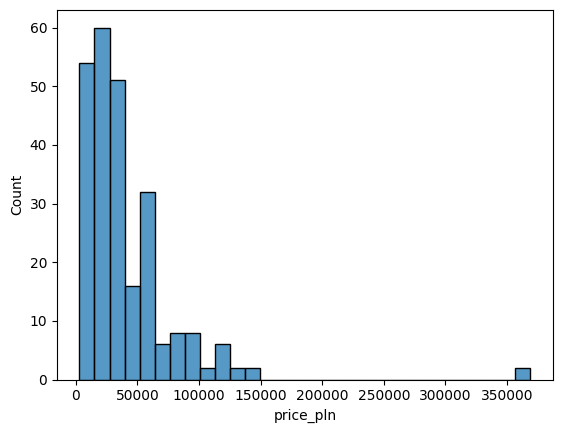

In [5]:
import seaborn as sns
sns.histplot(df["price_pln"], bins=30)

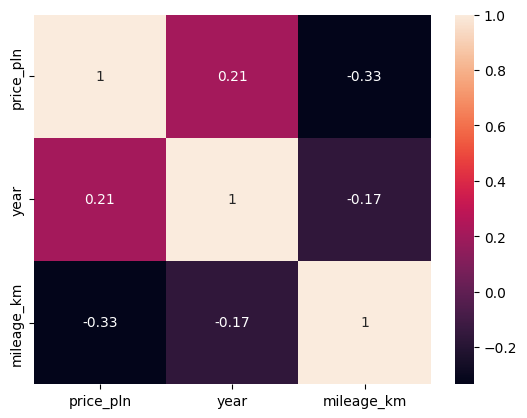

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation and plot
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()


<Axes: xlabel='year', ylabel='price_pln'>

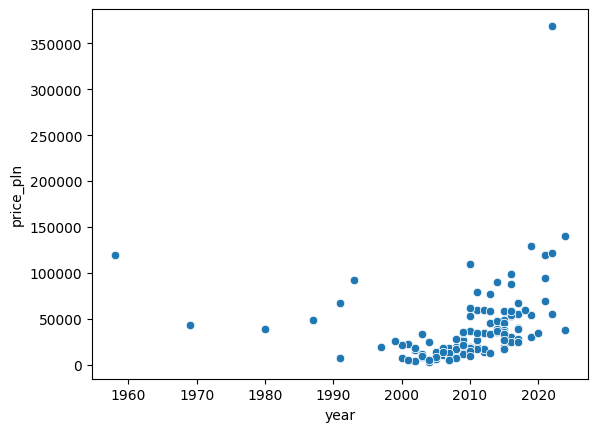

In [8]:
sns.scatterplot(x="year", y="price_pln", data=df)

<h1>PCA and t-Cne</h1>

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[["price_pln", "mileage_km", "year"]])

<h1>Classterization</h1>

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df["cluster"] = kmeans.fit_predict(df[["price_pln", "mileage_km"]])

In [13]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

# Ensure `df` is defined correctly. Check for NaN values in the specified columns.
if df[["model", "cluster"]].isnull().any().any():
    print("NaN values detected. Dropping rows with NaN.")
    df = df.dropna(subset=["model", "cluster"])  # Drop rows with NaN in relevant columns

# Proceed to compute the adjusted rand score
ari = adjusted_rand_score(df["model"], df["cluster"])
print(f"The Adjusted Rand Index is: {ari}")


NaN values detected. Dropping rows with NaN.
The Adjusted Rand Index is: 0.019617914217753166
